###시작

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
# def csv_to_parquet(csv_path, save_name):
#     df = pd.read_csv(csv_path)
#     df.to_parquet(f'./{save_name}.parquet')
#     del df
#     print(save_name, 'Done.')

In [53]:
# csv_to_parquet("/content/drive/MyDrive/data/train.csv","train")

In [54]:
# from google.colab import files
# files.download("train.parquet")

In [55]:
df = pd.read_csv("train.csv")

In [56]:
ddf=df.start_node_name.value_counts()

In [57]:
sum(ddf)

50000

In [58]:
sum(ddf.nlargest(10, keep='first'))

2830

###칼럼확인          칼럼설명(드랍여부)


  - id: 칼럼id -제거-
  - base_date: 날짜     -제거-
  - day_of_week: 요일         라벨로 변경
  - base_hour: 시간대
  - lane_count: 차로수
  - road_rating: 도로 등급       (106:지방도,103:일반국도,107:시도,군도)로 구성
  - road_name: 도로 이름
  - multi_linked: 중용구간 여부(0,1)로 구성  ->0개수:4698978 1개수:2239 -제거-
  - connect_code: 연결로 코드         (0,103)로 구성
  - maximum_speed_limit: 최고속도 제한       타겟과의 상관 관계가 제일 높음
  - vehicle_restricted: 통과제한 차량   (값이 한개임) -제거-
  - weight_restricted: 통과제한 하중         타겟과의 상관 관계가 두번째로 높음
  - height_restricted: 통과 제한 높이    (값이 한개임) -제거-
  - road_type: 도로 유형                     (0,3) 으로 구성 타겟과의 상관 관계가 세번재로 높음
  - start_node_name: 시작지점명            온핫 인코딩 사용?
  - start_latitude: 시작지점 위도
  - start_longitude: 시작지점 경도
  - start_turn_restricted: 시작 지점의 회전제한 유무      (있음,없음)으로 구성
  - end_node_name: 도착지점명             온핫 인코딩 사용?
  - end_latitude: 도착지점 위도
  - end_longitude: 도착지점 경도
  - end_turn_restricted: 도착 지점의 회전제한 유무    (있음,없음)으로 구성
  - target: 평균속도(km)


  1. 참조 https://www.law.go.kr/LSW/admRulInfoP.do?admRulSeq=2100000157569  (도로 규정)
  2. 참조 https://tttsss77.tistory.com/147 (위도, 경도로 지도 찾기)
  3. 참조 https://velog.io/@eodud0582/Folium 지도위에 표시(위도,경도 이용)
  4. 참조 https://bskyvision.com/entry/python-%EC%A3%BC%EC%86%8C%EB%A5%BC-%EC%9C%84%EB%8F%84-%EA%B2%BD%EB%8F%84-%EC%A2%8C%ED%91%9C%EB%A1%9C-%EB%B0%94%EA%BF%94%EC%A3%BC%EB%8A%94-Geocoder-API-%EC%82%AC%EC%9A%A9%EB%B2%95 도로명 주소로 (위도,경도 찾기)

In [59]:
df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [60]:
df.road_name.unique()

array(['지방도1112호선', '일반국도11호선', '일반국도16호선', '태평로', '일반국도12호선', '경찰로', '-',
       '외도천교', '일반국도99호선', '중정로', '번영로', '연동로', '중산간서로', '지방도1118호선',
       '새서귀로', '지방도1115호선', '지방도1132호선', '어시천교', '지방도1120호선', '삼무로',
       '애조로', '지방도1116호선', '일반국도95호선', '동부관광도로', '동홍로', '지방도97호선', '중문로',
       '연삼로', '중앙로', '산서로', '지방도1117호선', '연북로', '남조로', '지방도1119호선', '동문로',
       '한천로', '삼봉로', '고평교', '연북2교', '관광단지로', '권학로', '시청로', '신대로', '서사로',
       '관덕로', '관광단지1로', '신산로', '관광단지2로', '신광로', '지방도1136호선', '첨단로',
       '제2거로교', '시민광장로', '임항로', '수영장길', '애원로', '삼성로', '일주동로', '호서중앙로',
       '아봉로', '호근로'], dtype=object)

In [61]:
df[df["road_name"]=='-']

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
6,TRAIN_0000006,20220106,목,0,2,107,-,0,0,60.0,...,0,가동,33.418412,126.268029,없음,나동,33.414175,126.269378,없음,39.0
14,TRAIN_0000014,20220203,목,16,1,107,-,0,0,60.0,...,3,송목교,33.316913,126.624634,없음,송목교,33.317065,126.623867,없음,58.0
28,TRAIN_0000028,20220612,일,14,2,107,-,0,0,50.0,...,0,광평교차로,33.330822,126.354179,없음,금악,33.330673,126.354987,없음,59.0
30,TRAIN_0000030,20220623,목,6,2,107,-,0,0,80.0,...,0,일호유리,33.472276,126.418443,없음,상귀교차로,33.473390,126.409129,없음,75.0
31,TRAIN_0000031,20211028,목,15,1,107,-,0,0,60.0,...,3,남수교,33.337244,126.695809,없음,남수교,33.337398,126.696117,없음,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49943,TRAIN_0049943,20220302,수,15,1,107,-,0,0,60.0,...,0,가는질,33.356829,126.264075,없음,우사,33.358358,126.271652,없음,54.0
49945,TRAIN_0049945,20220527,금,15,2,107,-,0,0,80.0,...,0,광삼교,33.472505,126.424368,없음,일호유리,33.472276,126.418443,없음,56.0
49947,TRAIN_0049947,20220121,금,19,2,107,-,0,0,50.0,...,0,창성세차장,33.409416,126.259139,없음,한림어촌계,33.411255,126.257313,없음,28.0
49954,TRAIN_0049954,20211105,금,13,2,107,-,0,0,50.0,...,0,한림수협냉동창고,33.415529,126.261797,없음,한수풀횟집,33.413560,126.259693,없음,34.0


In [62]:
df.drop(["vehicle_restricted", "height_restricted"], axis = 1, inplace = True)

In [63]:
df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     50000 non-null  object 
 1   base_date              50000 non-null  int64  
 2   day_of_week            50000 non-null  object 
 3   base_hour              50000 non-null  int64  
 4   lane_count             50000 non-null  int64  
 5   road_rating            50000 non-null  int64  
 6   road_name              50000 non-null  object 
 7   multi_linked           50000 non-null  int64  
 8   connect_code           50000 non-null  int64  
 9   maximum_speed_limit    50000 non-null  float64
 10  weight_restricted      50000 non-null  float64
 11  road_type              50000 non-null  int64  
 12  start_node_name        50000 non-null  object 
 13  start_latitude         50000 non-null  float64
 14  start_longitude        50000 non-null  float64
 15  st

In [65]:
df.multi_linked.value_counts()

0    49969
1       31
Name: multi_linked, dtype: int64

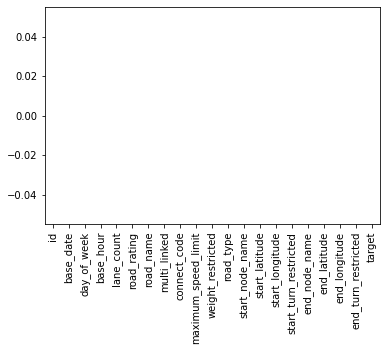

In [66]:
##결측치 확인
df.isnull().sum().plot(kind="bar")   ##null값 없음

###상관관계도 확인

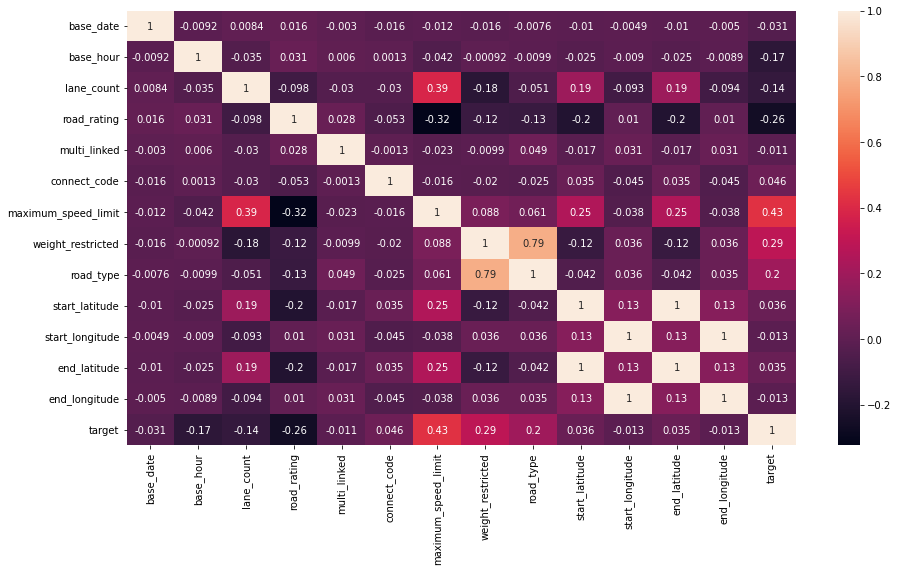

In [67]:
#상관관계도 확인
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True)
###최고 속도 제한이 제일 높음
###통과제한 하중 높이가 두번재
###도로 유형이 3번째
### 3개의 칼럼 확인

In [68]:
# 1차 자료형 변형
to_int32 = ["base_date", "base_hour", "lane_count", "road_rating", "multi_linked", "connect_code", "road_type"]
to_float32 = ["maximum_speed_limit", "weight_restricted", "target"]

for i in to_int32:
    df[i] = df[i].astype("int32")
for j in to_float32:
    df[j] = df[j].astype("float32")

In [69]:
# df["start_coord"] = pd.Series(zip(df.start_latitude,df.start_longitude))
# df["end_coord"] = pd.Series(zip(df.end_latitude,df.end_longitude))

In [70]:
# import geopy.distance # 거리 구하는 파이썬 라이브러리
# #  df.apply(lambda x: geopy.distance.distance(x['merch_coord'], x['cust_coord']).km, axis=1)
# def get_distance(row): 
#     coord1 = row['start_coord'] # [merch_lat, merch_long] / 상점 위경도
#     coord2 = row['end_coord'] # [lat, long] / 고객 위경도
#     return geopy.distance.distance(coord1, coord2).km
# df["distance"] = df.apply(get_distance, axis=1)

In [191]:
df.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


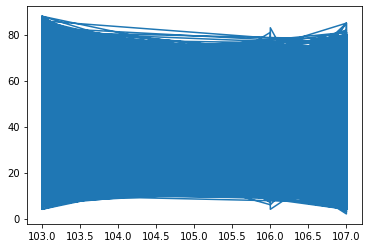

In [192]:
plt.plot(df["road_rating"],df["target"])

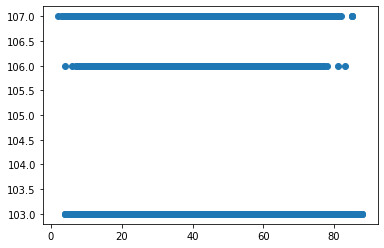

In [198]:
plt.scatter( df["target"], df["road_rating"])


### 속도 제한

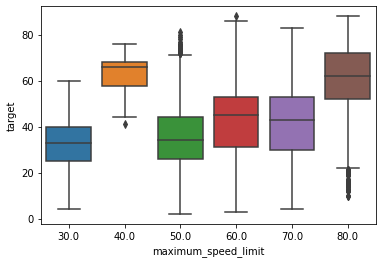

In [71]:
##너무 높은값 제거
sns.boxplot(x = "maximum_speed_limit", y = "target", data = df)


In [72]:
df[df["target"] >100] ##100km 이상달린값들 제거? (5건 존재)  ##10km이하 값들은 출퇴근시간에 너무 많음

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target


In [73]:
df2 = df[df["target"] <100].copy()

###최대 하중 확인

In [74]:
df.weight_restricted.unique()

array([32400.,     0., 43200., 50000.], dtype=float32)

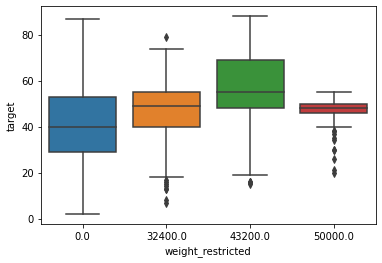

In [75]:
sns.boxplot(x='weight_restricted', y="target", data=df2)

weight_restricted
0.0        AxesSubplot(0.125,0.125;0.775x0.755)
32400.0    AxesSubplot(0.125,0.125;0.775x0.755)
43200.0    AxesSubplot(0.125,0.125;0.775x0.755)
50000.0    AxesSubplot(0.125,0.125;0.775x0.755)
Name: target, dtype: object

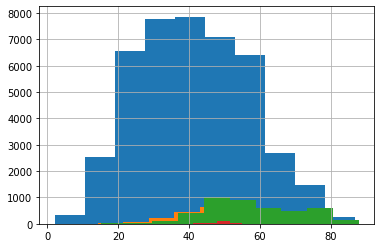

In [76]:
df2.groupby("weight_restricted")["target"].hist()

In [77]:
df2.groupby("weight_restricted")["target"].mean()  ###속도 제한이 없는경우 평균 속도가 떨어짐

weight_restricted
0.0        41.033207
32400.0    47.590191
43200.0    58.026421
50000.0    47.163551
Name: target, dtype: float32

###도로 유형(road_type)

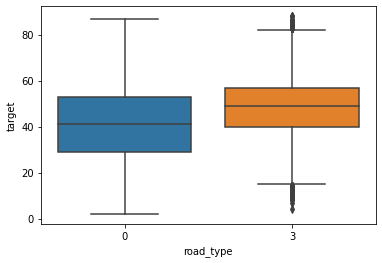

In [78]:
sns.boxplot(x='road_type', y="target", data=df2)

road_type
0    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: target, dtype: object

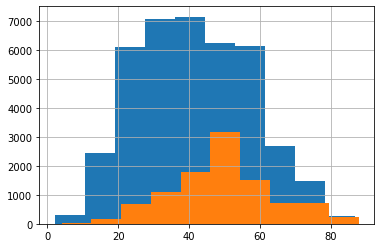

In [79]:
df2.groupby("road_type")["target"].hist()

In [80]:
df2.groupby("road_type")["target"].mean()
df2.groupby("road_type")["target"].std()

road_type
0    15.925824
3    14.456835
Name: target, dtype: float64

In [81]:
df2.drop(["multi_linked","id","base_date"], axis = 1, inplace = True)

In [82]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   day_of_week            50000 non-null  object 
 1   base_hour              50000 non-null  int32  
 2   lane_count             50000 non-null  int32  
 3   road_rating            50000 non-null  int32  
 4   road_name              50000 non-null  object 
 5   connect_code           50000 non-null  int32  
 6   maximum_speed_limit    50000 non-null  float32
 7   weight_restricted      50000 non-null  float32
 8   road_type              50000 non-null  int32  
 9   start_node_name        50000 non-null  object 
 10  start_latitude         50000 non-null  float64
 11  start_longitude        50000 non-null  float64
 12  start_turn_restricted  50000 non-null  object 
 13  end_node_name          50000 non-null  object 
 14  end_latitude           50000 non-null  float64
 15  en

###전처리

In [83]:
from sklearn.preprocessing import LabelEncoder

In [84]:
chage_c = ["day_of_week","road_name", "start_node_name", "end_node_name",
           "start_turn_restricted", "end_turn_restricted", "weight_restricted", "road_rating",
           "road_type",]
for i in chage_c:
    le = LabelEncoder()
    le=le.fit(df2[i])
    df2[i]=le.transform(df2[i])

In [85]:
df2.head()

,day_of_week,base_hour,lane_count,road_rating,road_name,connect_code,maximum_speed_limit,weight_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,1,17,1,1,46,0,60.0,1,1,386,33.427747,126.662612,0,386,33.427749,126.662335,0,52.0
1,1,21,2,0,34,0,60.0,0,0,32,33.500730,126.529107,1,2,33.504811,126.526240,0,30.0
2,4,7,2,0,36,0,80.0,0,0,426,33.279145,126.368598,0,179,33.280072,126.362147,0,61.0
3,0,13,2,2,57,0,50.0,0,0,58,33.246081,126.567204,0,203,33.245565,126.566228,0,20.0
4,6,8,2,0,35,0,80.0,0,0,267,33.462214,126.326551,0,269,33.462677,126.330152,0,38.0


###훈련셋 & 시험셋

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
X = df2.drop('target', axis=1)
y = df2.target

In [88]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=22
)

In [89]:
# 연속형 : RandomForestRegressor
# 범주형 : RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [90]:
model = RandomForestRegressor(random_state=100)
model.fit(X_train, y_train)
# 훈련셋 예측 -> 과최적화, 과적합 (Over-fitting)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test) # 시험셋 예측
# 1. train_pred은 높은데 test_pred는 그만큼 안높을 때 (오버피팅)
# 2. train_pred가 낮을 때 (언더피팅)

In [91]:
print(train_pred)

[30.4     45.86    40.49    ... 64.46    50.57375 28.26   ]


In [94]:

print(
    f"train_rmse : {mean_squared_error(y_train, train_pred, squared=False)}",
    f"test_rmse : {mean_squared_error(y_test, test_pred, squared=False)}",
)

# train_test_split -> 어떻게 뽑히냐에 따라서 모델/시험에 모두 영향

train_rmse : 2.5973034311668557 test_rmse : 5.680171782473631


In [95]:
df2.reset_index(drop=True, inplace=True) # 바로 원본을 바꾸고 싶다

In [96]:
from sklearn.model_selection import KFold

In [97]:
kf = KFold(n_splits=5)

In [119]:
X = df2.drop('target', axis=1)
y = df2.target

In [99]:
from sklearn.metrics import mean_squared_error

In [ ]:
# 하이퍼 패러미터 조정 + K-FOLD

# train_rmse_total = []
# test_rmse_total = []

# for train_index, test_index in kf.split(X): # 반복 <- 5기준으로 나뉜 K-Fold
#     X_train, X_test = X.loc[train_index], X.loc[test_index] # 독립변수들의 훈련셋/시험셋
#     y_train, y_test = y[train_index], y[test_index] # 종속변수의 훈련셋/시험셋

#     model = RandomForestRegressor(
#         n_estimators = 500,
#         max_depth = 60,
#         min_samples_split = 5,
#         min_samples_leaf = 1,
#         n_jobs= -1,
#         random_state = 100
#     )

#     model.fit(X_train, y_train) # 학습
#     train_pred = model.predict(X_train) # 훈련셋 예측 (잘 학습되었나? 과최적화, 오버피팅?)
#     test_pred = model.predict(X_test) # 시험셋 예측 (잘 예측하나?, 언더피팅)

#     train_rmse = mean_squared_error(y_train, train_pred, squared=False)
#     test_rmse = mean_squared_error(y_test, test_pred) ** 0.5 # ** 1/2
    
#     train_rmse_total.append(train_rmse)
#     test_rmse_total.append(test_rmse)

In [ ]:
model.score(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

In [ ]:
print(train_pred,test_pred)

In [ ]:
print(
    # 실제값, 예측값 -> 에러를 비교
    "train_rmse : ", sum(train_rmse_total) / len(train_rmse_total),
    "test_rmse : ", sum(test_rmse_total) / len(test_rmse_total)
)

In [126]:
import lightgbm as lgb
model = lgb.LGBMRegressor(random_state=100)
model.fit(X_train, y_train)
pred = model.predict(X_test)
model.score(X_train,y_train)

0.8552571319624254

In [ ]:
# import joblib # pkl 세이브파일을 만들어주는 라이브러리

# joblib.dump(model, 'randomForest_영광.pkl')

In [ ]:
# from google.colab import files

# files.download('randomForest_영광.pkl') # 다운로드

In [ ]:
import joblib
dt_model = joblib.load("/content/drive/MyDrive/data/ml_model/DecisionTree_채영.pkl")
dt_score = dt_model.score(X,y)
print("정확도: {dt_score:.3f}".format(dt_score = dt_score))
newfig["DecisionTree"] = dt_score

In [204]:
cb_model = joblib.load("/content/drive/MyDrive/data/ml_model/catboost_진혁.pkl")
cb_score = cb_model.score(X,y)
print("정확도: {cb_score:.3f}".format(cb_score = cb_score))
newfig["Catboost"] = cb_score

정확도: 0.904


In [159]:
knn_model = joblib.load("/content/drive/MyDrive/data/ml_model/knn_배.pkl")
knn_score = knn_model.score(X,y)
print("정확도: {knn_score:.3f}".format(knn_score = knn_score))
newfig["knn"] = knn_score

정확도: 0.905


In [160]:
xg_model = joblib.load("/content/drive/MyDrive/data/ml_model/서지원_XGBoost.pkl")
xg_score = xg_model.score(X,y)
print("정확도: {xg_score:.3f}".format(xg_score = xg_score))
newfig["XGBoost"] = xg_score

[05:30:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
정확도: 0.918


In [161]:
rf_model = joblib.load("/content/drive/MyDrive/data/ml_model/randomForest_영광.pkl")
rf_score = rf_model.score(X, y)
print("정확도: {rf_score:.3f}".format(rf_score = rf_score))
newfig["RandomForest"] = rf_score

정확도: 0.940


In [162]:
lg_model = joblib.load("/content/LG_준희.pkl")
lg_score = lg_model.score(X,y)
print("정확도: {lg_score:}".format(lg_score = lg_score))
newfig["LightGBM"] = lg_score

정확도: 0.8546858762417202


In [208]:
newfig

{'DecisionTree': 0.7031684321232253,
 'XGBoost': 0.9181325642534791,
 'RandomForest': 0.9400988674812889,
 'LightGBM': 0.8546858762417202,
 'Catboost': 0.9043539280765195}

In [214]:
figshow = pd.DataFrame([newfig])

In [215]:
figshow

,DecisionTree,XGBoost,RandomForest,LightGBM,Catboost
0,0.703168,0.918133,0.940099,0.854686,0.904354


In [211]:
figshow

,0
DecisionTree,0.703168
XGBoost,0.918133
RandomForest,0.940099
LightGBM,0.854686
Catboost,0.904354


In [212]:
figshow.rename(columns={0:'Model Score'})

,Model Score
DecisionTree,0.703168
XGBoost,0.918133
RandomForest,0.940099
LightGBM,0.854686
Catboost,0.904354


Text(0, 0.5, 'Score')

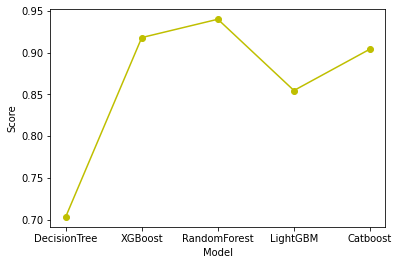

In [223]:
plt.plot(figshow.T,"yo-")
plt.xlabel("Model")
plt.ylabel("Score")